In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as se
%matplotlib inline

##Data exploration

In [2]:
train=pd.read_csv('/content/sample_data/california_housing_train.csv')
train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0


In [3]:
test=pd.read_csv('/content/sample_data/california_housing_test.csv')
test.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0


In [4]:
x_train = train.drop('median_house_value',axis=1)
y_train = train.median_house_value


In [5]:
x_test = test.drop('median_house_value',axis=1)
y_test = test.median_house_value


##Linear regression

We can simply run the regression models with the sklearn package by the following code snippet below:

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
round(model.score(x_train,y_train)*100,2)

64.13

Text(0.5, 1.0, 'Actual values against fitted values')

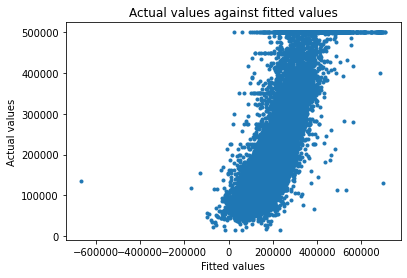

In [8]:
output = model.predict(x_train)
plt.plot(output,y_train, '.')
plt.xlabel('Fitted values')
plt.ylabel('Actual values')
plt.title('Actual values against fitted values')

In [9]:
print(x_test.isnull().sum())


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


In [10]:
round(model.score(x_test,y_test)*100,2)


61.95

Text(0.5, 1.0, 'Actual values against fitted values')

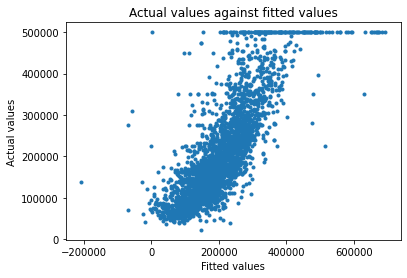

In [11]:
output2=model.predict(x_test)
plt.plot(output2,y_test, '.')
plt.xlabel('Fitted values')
plt.ylabel('Actual values')
plt.title('Actual values against fitted values')

Our first linear regression model of the x_train data on y_train data has only an accuracy of 64.13%. We further use this model on the test set, that is predicting the median_house_value in y_test by putting x_test into our model. A comparism of the original median house price with what our model predicted was 61.95% accurate.

##New model

A more robust model can be used for the regression fit hence the results compared.

In [12]:
from sklearn.ensemble import RandomForestRegressor
my_new_model = RandomForestRegressor()
my_new_model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
round(my_new_model.score(x_train,y_train)*100.00,2)


97.56

Text(0.5, 1.0, 'Actual values against fitted values')

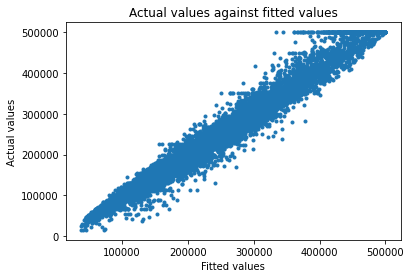

In [14]:
output3 = my_new_model.predict(x_train)
plt.plot(output3,y_train, '.')
plt.xlabel('Fitted values')
plt.ylabel('Actual values')
plt.title('Actual values against fitted values')

In [15]:
round(my_new_model.score(x_test,y_test)*100,2)


80.84

Text(0.5, 1.0, 'Actual values against fitted values')

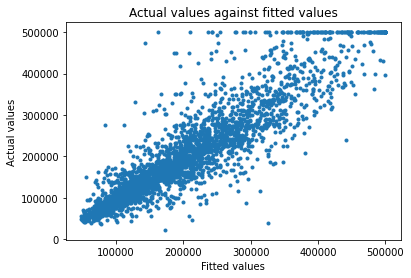

In [16]:
output4 = my_new_model.predict(x_test)
plt.plot(output4,y_test, '.')
plt.xlabel('Fitted values')
plt.ylabel('Actual values')
plt.title('Actual values against fitted values')

Here the model is accurate to 97.55% on the train set. The test set prediction is also accurate  to 80.93%. This means that the model passes through 80% of the unknown response in y_test data points!!

The plot of the fitted response against actual response gives an indication of the accuracy of the model. Here higher accuracy corresponds to smoother scatter plots of the fitted values and actual values. 